Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


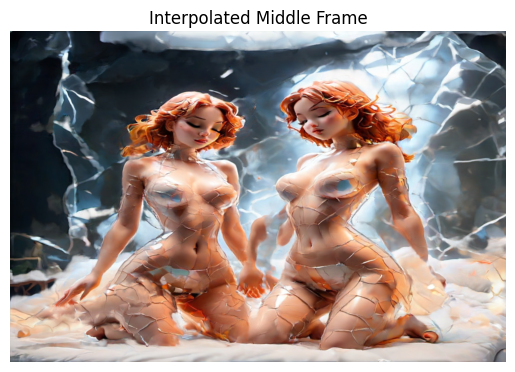

In [9]:
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

# 加载 TorchScript 模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load("model/film_style.pt", map_location=device).eval()

# 准备插帧输入（图像路径你可以换成自己的）
img1 = Image.open("photos/image0.jpg").convert("RGB")
img3 = Image.open("photos/image1.jpg").convert("RGB")

# 预处理成张量
to_tensor = T.Compose([
    T.Resize((720, 1080)),  # 可按需要调整尺寸
    T.ToTensor()
])

x1 = to_tensor(img1).unsqueeze(0).to(device)
x3 = to_tensor(img3).unsqueeze(0).to(device)
dt = torch.tensor([[0.5]], dtype=torch.float32).to(device)  # 中间时间

# 插帧预测
with torch.no_grad():
    x2 = model(x1, x3, dt)

# 转为图片展示
output = x2.squeeze().cpu().permute(1, 2, 0).numpy()
plt.imshow(output)
plt.title("Interpolated Middle Frame")
plt.axis("off")
plt.show()


In [1]:
import torch
from model import load_model_from_pth  # 你已有这个函数
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model = load_model_from_pth("checkpoints/film_epoch10.pth", device=device)  # 你最新的 checkpoint

# 创建 dummy input（必须和模型输入格式一致）
dummy_img = torch.rand(1, 3, 512, 512).to(device)
dummy_dt = torch.tensor([[0.5]], dtype=torch.float32, device=device)

# 转为 TorchScript
model.eval()
traced = torch.jit.trace(model, (dummy_img, dummy_img, dummy_dt))

# 保存
os.makedirs("model", exist_ok=True)
traced.save("model/film_sft_latest_g.pt")


ImportError: cannot import name 'load_model_from_pth' from 'model' (unknown location)